# Analysis 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
from datetime import datetime
import statsmodels.api as sm
from functools import reduce

import warnings
warnings.filterwarnings('ignore')

In [2]:
from get_dataset import Finance
F = Finance()

### Average Return by Sector

In [3]:
sector_close = F.adj_close_mean_sector()
sector_close.tail()

,Industrials,Health Care
Date,,
2023-03-20,165.668219,223.004504
2023-03-21,167.806439,225.812754
2023-03-22,164.731780,221.450769
2023-03-23,164.063425,221.219999
2023-03-24,164.719452,224.292308


In [4]:
df_returns = round(sector_close.pct_change()*100, 2)
df_returns.index = pd.to_datetime(df_returns.index).date

# # df_returns.reset_index(inplace=True)
# # df_returns.rename(columns={'index':'Date'}, inplace=True)

# end = datetime.now()
# begins = pd.to_datetime(datetime(end.year-10, end.month, end.day))

# # df_returns = df_returns.loc[df_returns.index >= begins]
df_returns.head()
# df_returns.reset_index()

,Industrials,Health Care
2000-01-03,NaN,NaN
2000-01-04,-2.59,-3.27
2000-01-05,0.57,0.95
2000-01-06,1.51,1.19
2000-01-07,2.43,7.25


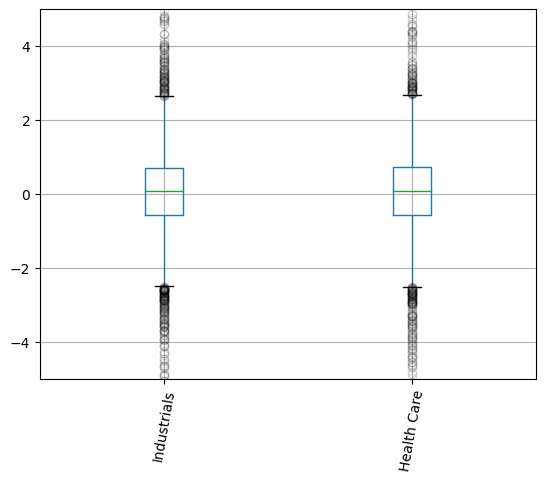

In [5]:
plt.figure()
# begins = 
df_returns.boxplot(flierprops={'alpha': 0.1})
plt.xticks(rotation=80)
plt.ylim([-5,5])
plt.show()

In [96]:
#Total return
Re = {c: [df_returns[c].sum()] for c in df_returns.columns}
Re = pd.DataFrame(Re).T.reset_index()
Re.rename(columns={'index': 'Sector', 0: 'Total Return'}, inplace=True)
Re.sort_values('Total Return', ascending=False)
# for c in df_returns.columns:
#     print('{:>10}{:>10.2f}%'.format(c,df_returns[c].sum()))

,Sector,Total Return
9,Real Estate Mean Return,377.28
5,Consumer Discretionary Mean Return,354.96
10,Energy Mean Return,334.80
1,Health Care Mean Return,313.42
0,Industrials Mean Return,287.31
2,Information Technology Mean Return,274.98
8,Materials Mean Return,266.70
6,Utilities Mean Return,249.95
4,Consumer Staples Mean Return,230.94
3,Communication Services Mean Return,224.12


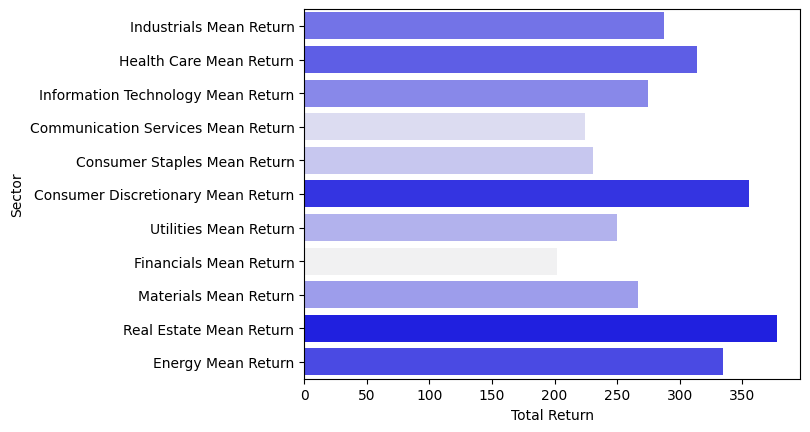

In [97]:
plt.figure()
cmap = sns.color_palette("light:b", Re.shape[0])
rank = Re['Total Return'].values.argsort().argsort() 
sns.barplot(x='Total Return', y='Sector', data=Re, palette=np.array(cmap)[rank])
plt.show()